In [ ]:
%cd /content/drive/MyDrive/전주시 공모전/데이터

[Errno 2] No such file or directory: '/content/drive/MyDrive/전주시 공모전/데이터'
/content


In [ ]:
!pip install haversine

In [ ]:
!pip install gurobipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 74.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
from scipy.spatial import distance_matrix
from gurobipy import *
from numpy import random
import time
import pandas as pd
from haversine import haversine

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# CCTV

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/전주시 공모전/전주시_법정동_최종_데이터/전주시_CCTV_법정동.csv',encoding = 'utf-8')
len(df1)

267

In [ ]:
coords_list = [
    [ 35.774881  , 127.0958734 ],
       [ 35.8000853 , 127.1322227 ],
       [ 35.79791418, 127.1162367 ],
       [ 35.79298434, 127.104789  ],
       [ 35.796362  , 127.088843  ],
       [ 35.77969881, 127.101565  ],
       [ 35.79724721, 127.1238464 ],
       [ 35.76514096, 127.0929286 ],
       [ 35.79227508, 127.1145576 ],
       [ 35.79410261, 127.0778006 ]
    ]
cctv = df1
# 빈 데이터프레임 생성
result = pd.DataFrame()

# 각 좌표에 대해 필터링 수행
for coords in coords_list:
    위도, 경도 = coords
    temp_result = cctv[(cctv['WGS84위도'] == 위도) & (cctv['WGS84경도'] == 경도)]
    result = pd.concat([result, temp_result])

result

,번호,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치연월,관리기관전화번호,WGS84위도,WGS84경도,데이터기준일자,행정동,법정동
1,7,전북특별자치도 전주시청,NaN,전북특별자치도 전주시 완산구 용복동 539-1,생활방범,3,200,360도 전방면,30,2017-01,063-281-2072,35.774881,127.095873,2022-08-25,삼천동,용복동
27,135,전북특별자치도 전주시청,전북특별자치도 전주시 완산구 안행8길 30,전북특별자치도 전주시 완산구 삼천동1가 752-4,어린이보호,3,200,360도 전방면,30,2015-01,063-281-2072,35.800085,127.132223,2022-08-25,삼천동,삼천동1가
31,142,전북특별자치도 전주시청,전북특별자치도 전주시 완산구 삼천천변3길 60,전북특별자치도 전주시 완산구 삼천동1가 287-11,어린이보호,2,200,360도 전방면,30,2015-01,063-281-2072,35.797914,127.116237,2022-08-25,삼천동,삼천동1가
37,198,전북특별자치도 전주시청,전북특별자치도 전주시 완산구 용산마을길 18,전북특별자치도 전주시 완산구 삼천동2가 209-4,생활방범,3,200,360도 전방면,30,2019-01,063-281-2072,35.792984,127.104789,2022-08-25,삼천동,삼천동2가
61,369,전북특별자치도 전주시청,NaN,전북특별자치도 전주시 완산구 삼천동3가 6-7,어린이보호,2,200,360도 전방면,30,2018-01,063-281-2072,35.796362,127.088843,2022-08-25,삼천동,삼천동3가
82,537,전북특별자치도 전주시청,NaN,전북특별자치도 전주시 완산구 삼천동2가 426-1,생활방범,1,200,360도 전방면,30,2014-01,063-281-2072,35.779699,127.101565,2022-08-25,삼천동,삼천동2가
89,626,전북특별자치도 전주시청,전북특별자치도 전주시 완산구 거마산2길4-7,전북특별자치도 전주시 완산구 삼천동1가 625-12,생활방범,3,200,360도 전방면,30,2015-01,063-281-2072,35.797247,127.123846,2022-08-25,삼천동,삼천동1가
159,1013,전북특별자치도 전주시청,전북특별자치도 전주시 완산구 중인1길 157,전북특별자치도 전주시 완산구 중인동 868-1,생활방범,2,200,360도 전방면,30,2014-01,063-281-2072,35.765141,127.092929,2022-08-25,삼천동,중인동
163,1023,전북특별자치도 전주시청,전북특별자치도 전주시 완산구 장승배기로 14,전북특별자치도 전주시 완산구 삼천동1가 305-43,어린이보호,3,200,360도 전방면,30,2009-01,063-281-2072,35.792275,127.114558,2022-08-25,삼천동,삼천동1가
211,1320,전북특별자치도 전주시청,전북특별자치도 전주시 완산구 쑥고개옛길 126,전북특별자치도 전주시 완산구 삼천동3가 689,생활방범,3,200,360도 전방면,30,2016-01,063-281-2072,35.794103,127.077801,2022-08-25,삼천동,삼천동3가


In [ ]:
result['소재지지번주소']

1         전북특별자치도 전주시 완산구 용복동 539-1
27      전북특별자치도 전주시 완산구 삼천동1가 752-4
31     전북특별자치도 전주시 완산구 삼천동1가 287-11
37      전북특별자치도 전주시 완산구 삼천동2가 209-4
61        전북특별자치도 전주시 완산구 삼천동3가 6-7
82      전북특별자치도 전주시 완산구 삼천동2가 426-1
89     전북특별자치도 전주시 완산구 삼천동1가 625-12
159       전북특별자치도 전주시 완산구 중인동 868-1
163    전북특별자치도 전주시 완산구 삼천동1가 305-43
211       전북특별자치도 전주시 완산구 삼천동3가 689
Name: 소재지지번주소, dtype: object

In [ ]:
# # 확인할 좌표 리스트
# coords1 = [
#     [35.79789971, 127.1283968],
#     [35.7977366, 127.114272],
#     [35.79344236, 127.1151093]
# ]

# # 각 좌표가 CCTV 데이터 프레임에 속해있는지 확인
# for coord in coords1:
#     위도, 경도 = coord
#     if ((cctv['위도'] == 위도) & (cctv['경도'] == 경도)).any():
#         print(f"좌표 ({위도}, {경도})는 CCTV 데이터 프레임에 존재합니다.")
#     else:
#         print(f"좌표 ({위도}, {경도})는 CCTV 데이터 프레임에 존재하지 않습니다.")

In [ ]:
# # 확인할 좌표 리스트-송천동
# coords3 = [
#     [ 35.79333984, 127.1411975 ],
#        [ 35.80041239, 127.1425856 ],
#        [ 35.79264502, 127.1358235 ]
#     ]
# cctv = df1
# # 각 좌표가 CCTV 데이터 프레임에 속해있는지 확인
# for coord in coords3:
#     위도, 경도 = coord
#     if ((cctv['위도'] == 위도) & (cctv['경도'] == 경도)).any():
#         print(f"좌표 ({위도}, {경도})는 CCTV 데이터 프레임에 존재합니다.")
#     else:
#         print(f"좌표 ({위도}, {경도})는 CCTV 데이터 프레임에 존재하지 않습니다.")

In [ ]:
# # 확인할 좌표 리스트-평화동
# coords3 = [
#     [ 35.86402241, 127.1228155 ],
#        [ 35.85582666, 127.1210558 ],
#        [ 35.86606542, 127.1134098 ]
#     ]
# cctv = df1
# # 각 좌표가 CCTV 데이터 프레임에 속해있는지 확인
# for coord in coords2:
#     위도, 경도 = coord
#     if ((cctv['위도'] == 위도) & (cctv['경도'] == 경도)).any():
#         print(f"좌표 ({위도}, {경도})는 CCTV 데이터 프레임에 존재합니다.")
#     else:
#         print(f"좌표 ({위도}, {경도})는 CCTV 데이터 프레임에 존재하지 않습니다.")

## 삼천동

In [ ]:
place = pd.read_csv('/content/drive/MyDrive/전주시 공모전/전주시_법정동_최종_데이터/전주시_주택_법정동.csv', encoding='utf-8')
place = place[place['법정동'].str.contains('삼천' or '중인' or '용복')]

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/전주시 공모전/전주시_법정동_최종_데이터/전주시_CCTV_법정동.csv',encoding = 'utf-8')
df1_cctv = df1[df1['법정동'].str.contains('삼천동1가|삼천동2가|삼천동3가|중인동|용복동')]

len(df1_cctv)

86

In [ ]:
cctv_points = np.array([list(i) for i in zip(df1_cctv['WGS84위도'], df1_cctv['WGS84경도'])])
cctv_points

array([[ 35.77586896, 127.0871401 ],
       [ 35.774881  , 127.0958734 ],
       [ 35.79910199, 127.1192354 ],
       [ 35.79050408, 127.1128678 ],
       [ 35.7982405 , 127.1218425 ],
       [ 35.79525132, 127.1230817 ],
       [ 35.79663498, 127.1239507 ],
       [ 35.80071275, 127.1223256 ],
       [ 35.80140453, 127.1232215 ],
       [ 35.796971  , 127.118414  ],
       [ 35.801526  , 127.122303  ],
       [ 35.79435933, 127.1180338 ],
       [ 35.8000853 , 127.1322227 ],
       [ 35.79791418, 127.1162367 ],
       [ 35.79371535, 127.1182376 ],
       [ 35.79773144, 127.1172827 ],
       [ 35.7998547 , 127.1315843 ],
       [ 35.801664  , 127.129119  ],
       [ 35.79446376, 127.1194607 ],
       [ 35.79298434, 127.104789  ],
       [ 35.79474659, 127.1172184 ],
       [ 35.80081624, 127.1199918 ],
       [ 35.79652185, 127.124337  ],
       [ 35.79541232, 127.1196216 ],
       [ 35.80103378, 127.1177012 ],
       [ 35.80052039, 127.1291703 ],
       [ 35.79693955, 127.1204853 ],
 

In [ ]:
df_cctv = pd.DataFrame(cctv_points, columns=['위도', '경도'])
df_cctv.head()
df_cctv.to_csv('/content/drive/MyDrive/전주시 공모전/전주시_시각화_최종_데이터/삼천동_cctv.csv',index = False )

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/전주시 공모전/전주시_법정동_최종_데이터/전주시_병원_법정동1.csv',encoding = 'utf-8')
df2_hospital = df2[df2['법정동'].str.contains('삼천동1가|삼천동2가|삼천동3가|중인동|용복동')]

len(df2_hospital)

6

In [ ]:
hospital_points = np.array([list(i) for i in zip(df2_hospital['위도'], df2_hospital['경도'])])
hospital_points

array([[ 35.80087761, 127.1278535 ],
       [ 35.79365647, 127.0767305 ],
       [ 35.76707707, 127.0887394 ],
       [ 35.79847829, 127.1162915 ],
       [ 35.80408206, 127.0857351 ],
       [ 35.79204365, 127.117843  ]])

In [ ]:
df3 = pd.read_excel('/content/drive/MyDrive/전주시 공모전/전주시_법정동_최종_데이터/전주시_의원_법정동 최종.xlsx')
df3_doc = df3[df3['법정동'].str.contains('삼천동1가|삼천동2가|삼천동3가|중인동|용복동')]

len(df3_doc)

45

In [ ]:
doc_points = np.array([list(i) for i in zip(df3_doc['Latitude'], df3_doc['Longitude'])])
doc_points

array([[ 35.7945115, 127.1170709],
       [ 35.7988609, 127.1138207],
       [ 35.801397 , 127.1284145],
       [ 35.799665 , 127.1270782],
       [ 35.7929676, 127.122499 ],
       [ 35.7989404, 127.1297021],
       [ 35.8015644, 127.1245437],
       [ 35.7973139, 127.1242877],
       [ 35.7983407, 127.1159452],
       [ 35.7977441, 127.1246996],
       [ 35.7944096, 127.1261278],
       [ 35.7952502, 127.105418 ],
       [ 35.8008719, 127.1278153],
       [ 35.7920631, 127.1196332],
       [ 35.7943313, 127.1170708],
       [ 35.7921013, 127.1171128],
       [ 35.795107 , 127.1170689],
       [ 35.7981996, 127.1157246],
       [ 35.7967861, 127.1252309],
       [ 35.7992703, 127.1293598],
       [ 35.7997253, 127.1125997],
       [ 35.7944118, 127.1157724],
       [ 35.7981386, 127.1286124],
       [ 35.7938991, 127.1238725],
       [ 35.7988178, 127.1170748],
       [ 35.7993942, 127.1292436],
       [ 35.7958455, 127.115767 ],
       [ 35.7975653, 127.1166515],
       [ 35.799665 ,

In [ ]:
df4 = pd.read_csv('/content/drive/MyDrive/전주시 공모전/전주시_법정동_최종_데이터/전주시_경로당_법정동.csv',encoding = 'utf-8')
df4_silvertown = df4[df4['법정동'].str.contains('삼천동1가|삼천동2가|삼천동3가|중인동|용복동')]

len(df4_silvertown)

51

In [ ]:
silvertown_points = np.array([list(i) for i in zip(df4_silvertown['위도'], df4_silvertown['경도'])])
silvertown_points

array([[ 35.79876593, 127.1226856 ],
       [ 35.80128124, 127.1242059 ],
       [ 35.80006988, 127.1226824 ],
       [ 35.7982178 , 127.1256384 ],
       [ 35.80113331, 127.1305287 ],
       [ 35.80185601, 127.1310427 ],
       [ 35.80133589, 127.1219729 ],
       [ 35.79768781, 127.1243781 ],
       [ 35.79995967, 127.1275199 ],
       [ 35.79912152, 127.124745  ],
       [ 35.79527015, 127.1272377 ],
       [ 35.79744025, 127.1290677 ],
       [ 35.79789971, 127.1283968 ],
       [ 35.79492105, 127.1214444 ],
       [ 35.79543303, 127.1283236 ],
       [ 35.79628037, 127.1306079 ],
       [ 35.79610181, 127.1265832 ],
       [ 35.79622852, 127.1279569 ],
       [ 35.79174702, 127.1185098 ],
       [ 35.79609007, 127.1246256 ],
       [ 35.79379706, 127.1172855 ],
       [ 35.76526068, 127.0926473 ],
       [ 35.7977366 , 127.114272  ],
       [ 35.78349338, 127.1016042 ],
       [ 35.79339389, 127.1022184 ],
       [ 35.7922096 , 127.0877605 ],
       [ 35.80061326, 127.1126323 ],
 

In [ ]:
df5 = pd.read_excel('/content/drive/MyDrive/전주시 공모전/전주시_법정동_최종_데이터/전주시_노인복지시설_법정동_최종.xlsx')
df5_oldhouse = df5[df5['법정동'].str.contains('삼천동1가|삼천동2가|삼천동3가|중인동|용복동')]

len(df5_oldhouse)

7

In [ ]:
oldhouse_points = np.array([list(i) for i in zip(df5_oldhouse['Latitude'], df5_oldhouse['Longitude'])])
oldhouse_points

array([[ 35.8004791, 127.1294342],
       [ 35.7687636, 127.10368  ],
       [ 35.8020405, 127.0766949],
       [ 35.7939725, 127.0744135],
       [ 35.7947312, 127.0788089],
       [ 35.8015961, 127.0775037],
       [ 35.8005155, 127.1328775]])

In [ ]:
# 경찰서 없음

df6 = pd.read_csv('/content/drive/MyDrive/전주시 공모전/전주시_법정동_최종_데이터/전주시_경찰서_법정동.csv', encoding='utf-8')
df6['법정동'] = df6['법정동'].fillna('없음')
df6_police = df6[df6['법정동'].str.contains('삼천동1가|삼천동2가|삼천동3가|중인동|용복동')]

len(df6_police)

1

In [ ]:
police_points = np.array([list(i) for i in zip(df6_police['Latitude'], df6_police['Longitude'])])
police_points

array([[ 35.7998392, 127.1212078]])

In [ ]:
df7 = pd.read_csv('/content/drive/MyDrive/전주시 공모전/전주시_법정동_최종_데이터/전주시_보안등_법정동1.csv',encoding = 'utf8')
df7_light = df7[df7['법정동'].str.contains('삼천동1가|삼천동2가|삼천동3가|중인동|용복동')]

len(df7_light)

30

In [ ]:
light_points = np.array([list(i) for i in zip(df7_light['posy'], df7_light['posx'])])
light_points

array([[ 35.79568521, 127.1142947 ],
       [ 35.79231161, 127.1125559 ],
       [ 35.79236576, 127.11247854],
       [ 35.79235673, 127.11250066],
       [ 35.79237016, 127.1125947 ],
       [ 35.79234755, 127.11267763],
       [ 35.79234769, 127.11252277],
       [ 35.79403047, 127.12430642],
       [ 35.80039647, 127.12129058],
       [ 35.80218063, 127.11937379],
       [ 35.77905106, 127.09789355],
       [ 35.79403903, 127.09798107],
       [ 35.77941622, 127.0919989 ],
       [ 35.78296836, 127.10175024],
       [ 35.77552862, 127.10413519],
       [ 35.77555116, 127.10411863],
       [ 35.76460934, 127.09074057],
       [ 35.77907546, 127.1063076 ],
       [ 35.77726397, 127.10365911],
       [ 35.7901342 , 127.0698109 ],
       [ 35.77555899, 127.0790491 ],
       [ 35.79516847, 127.08536856],
       [ 35.79302776, 127.08242375],
       [ 35.79164715, 127.07818284],
       [ 35.79166068, 127.07817733],
       [ 35.78971423, 127.08115377],
       [ 35.80393285, 127.08272267],
 

In [ ]:
X = list(list(df2_hospital['위도']) + list(df3_doc['Latitude']) + list(df4_silvertown['위도']) + list(df5_oldhouse['Latitude']) + list(df6_police['Latitude']) + list(df7_light['posy']))

In [ ]:
Y = list(list(df2_hospital['경도']) + list(df3_doc['Longitude']) + list(df4_silvertown['경도']) + list(df5_oldhouse['Longitude']) + list(df6_police['Longitude']) + list(df7_light['posx']))

In [ ]:
points = np.array([list(i) for i in zip(X, Y)])
print(points.shape)
points[:2]

(140, 2)


array([[ 35.80087761, 127.1278535 ],
       [ 35.79365647, 127.0767305 ]])

In [ ]:
df_fa = pd.DataFrame(points, columns=['위도', '경도'])
df_fa.head()
df_fa.to_csv('/content/drive/MyDrive/전주시 공모전/전주시_시각화_최종_데이터/삼천동_수요시설.csv',index = False )

In [ ]:
#전체w = points.shape[0]
전체w= cctv_points.shape[0]
cctvw = df1_cctv.shape[0]
hospitalw = df2_hospital.shape[0]
docw = df3_doc.shape[0]
silvertownw = df4_silvertown.shape[0]
oldhousew = df5_oldhouse.shape[0]
policew = df6_police.shape[0]
lightw = df7_light.shape[0]

#m1 = 0.278 * (전체w-cctvw) / 전체w #0.278 무슨 값?
# m2 = 0.059 * (전체w-hospitalw) / 전체w
# m3 = 0.135 * (전체w-docw) / 전체w
# m4 = 0.164 * (전체w-silvertownw) / 전체w
# m5 = 0.136 * (전체w-oldhousew) / 전체w
# m6 = 0.074 * (전체w-policew) / 전체w
# m7 = 0.097 * (전체w-lightw) / 전체w

In [ ]:
def mclp(cctv, hospital_points, doc_points, silvertown_points,
         oldhouse_points, police_points, light_poinst, points, K, radius):
    """
    Solve maximum covering location problem
    Input:
        points: 수요지점 좌표 (CCTV가 있으면 좋은 지표들의 위치)
        K: 배치할 CCTV의 수
        radius: 반경 (CCTV의 적합한 반경)
    Return:
        opt_sites: locations K optimal sites, Numpy array in shape of [K,2]
        f: the optimal value of the objective function
    """
    print('  Number of points %g' % points.shape[0]) #여기서 point 가 의미하는 것?? 추가 수요지점?(아니면 총합?)
    print('  K %g' % K)
    print('  Radius %g' % radius)

    start = time.time()
    sites = np.array([list(i) for i in zip(cctv['WGS84위도'], cctv['WGS84경도'])])
    J = sites.shape[0]

    # 수요지점 수
    #A = cctv_points.shape[0]
    B = hospital_points.shape[0]
    C = doc_points.shape[0]
    D = silvertown_points.shape[0]
    E = oldhouse_points.shape[0]
    F = police_points.shape[0]
    G = light_points.shape[0]

    # 입지후보지와 수요지점 간 거리 계산 (haversine으로 수정)
    #D1 = []
    #for i in cctv_points:
    #    site = []
    #    for j in sites:
    #        site.append(haversine(i, j)*1000)     # 단위를 m로 변경하기 위해 *1000
    #    D1.append(site)
    #D1 = np.array(D1)

    D2 = []
    for i in hospital_points:
        site = []
        for j in sites:
            site.append(haversine(i, j)*1000)
        D2.append(site)
    D2 = np.array(D2)

    D3 = []
    for i in doc_points:
        site = []
        for j in sites:
            site.append(haversine(i, j)*1000)
        D3.append(site)
    D3 = np.array(D3)

    D4 = []
    for i in silvertown_points:
        site = []
        for j in sites:
            site.append(haversine(i, j)*1000)
        D4.append(site)
    D4 = np.array(D4)

    D5 = []
    for i in oldhouse_points:
        site = []
        for j in sites:
            site.append(haversine(i, j)*1000)
        D5.append(site)
    D5 = np.array(D5)

    D6 = []
    for i in police_points:
        site = []
        for j in sites:
            site.append(haversine(i, j)*1000)
        D6.append(site)
    D6 = np.array(D6)

    D7 = []
    for i in light_points:
        site = []
        for j in sites:
            site.append(haversine(i, j)*1000)
        D7.append(site)
    D7 = np.array(D7)

    for i in [D2, D3, D4, D5, D6, D7]:
        mask1 = i<=radius
        i[mask1]=1
        i[~mask1]=0

    m = Model()
    x2, x3, x4, x5, x6, x7 = {}, {}, {}, {}, {}, {}
    y = {}

    # 수요지점 변수 추가
    #for i in range(A):
    #    x1[i] = m.addVar(vtype=GRB.BINARY, name="x1%d" % i)
    for i in range(B):
        x2[i] = m.addVar(vtype=GRB.BINARY, name="x2%d" % i)
    for i in range(C):
        x3[i] = m.addVar(vtype=GRB.BINARY, name="x3%d" % i)
    for i in range(D):
        x4[i] = m.addVar(vtype=GRB.BINARY, name="x4%d" % i)
    for i in range(E):
        x5[i] = m.addVar(vtype=GRB.BINARY, name="x5%d" % i)
    for i in range(F):
        x6[i] = m.addVar(vtype=GRB.BINARY, name="x6%d" % i)
    for i in range(G):
        x7[i] = m.addVar(vtype=GRB.BINARY, name="x7%d" % i)

    # 입지후보지 변수 추가
    for j in range(J):
        y[j] = m.addVar(vtype=GRB.BINARY, name="y%d" % j)

    m.update()
    m.addConstr(quicksum(y[j] for j in range(J)) == K)

    # 수요지점 제약 조건
    #for i in range(A):
    #    m.addConstr(quicksum(y[j] for j in np.where(D1[i]==1)[0]) >= x1[i])
    for i in range(B):
        m.addConstr(quicksum(y[j] for j in np.where(D2[i]==1)[0]) >= x2[i])
    for i in range(C):
        m.addConstr(quicksum(y[j] for j in np.where(D3[i]==1)[0]) >= x3[i])
    for i in range(D):
        m.addConstr(quicksum(y[j] for j in np.where(D4[i]==1)[0]) >= x4[i])
    for i in range(E):
        m.addConstr(quicksum(y[j] for j in np.where(D5[i]==1)[0]) >= x5[i])
    for i in range(F):
        m.addConstr(quicksum(y[j] for j in np.where(D6[i]==1)[0]) >= x6[i])
    for i in range(G):
        m.addConstr(quicksum(y[j] for j in np.where(D7[i]==1)[0]) >= x7[i])

    # 목적함수 수정
    #m.setObjective(quicksum(i for i in [1*x1[a] for a in range(A)] + [1*x2[b] for b in range(B)] + [1*x3[c] for c in range(C)] + [1*x4[d] for d in range(D)] + [1*x4[e] for e in range(E)]
    #                        + [1*x4[f] for f in range(F)] + [1*x4[g] for g in range(G)]),\
    #               GRB.MAXIMIZE)     # 1 대신 가중치 입력
    m.setObjective(quicksum(i for i in [0.0591*x2[b] for b in range(B)] + [0.1353*x3[c] for c in range(C)] + [0.1636*x4[d] for d in range(D)] + [0.1362*x5[e] for e in range(E)]
                            + [0.0737*x6[f] for f in range(F)] + [0.0973*x7[g] for g in range(G)]),\
                   GRB.MAXIMIZE)     # 1 대신 가중치 입력

    m.setParam('OutputFlag', 0)
    m.optimize()
    end = time.time()
    print('----- Output -----')
    print('  Running time : %s seconds' % float(end-start))
    print('  Optimal coverage points: %g' % m.objVal)

    solution = []
    if m.status == GRB.Status.OPTIMAL:
        for v in m.getVars():
            if v.x==1 and v.varName[0]=="y":
                solution.append(int(v.varName[1:]))
    opt_sites = sites[solution]
    return opt_sites,m.objVal

In [ ]:
def plot_input(points):
    '''
    Plot the result
    Input:
        points: input points, Numpy array in shape of [N,2]
        opt_sites: locations K optimal sites, Numpy array in shape of [K,2]
        radius: the radius of circle
    '''
    from matplotlib import pyplot as plt
    fig = plt.figure(figsize=(8,8))
    plt.scatter(points[:,0],points[:,1],c='C0')
    ax = plt.gca()
    ax.axis('equal')
    ax.tick_params(axis='both',left=False, top=False, right=False,
                       bottom=False, labelleft=False, labeltop=False,
                       labelright=False, labelbottom=False)

In [ ]:
def plot_result(points,opt_sites,radius):
    '''
    Plot the result
    Input:
        points: input points, Numpy array in shape of [N,2]
        opt_sites: locations K optimal sites, Numpy array in shape of [K,2]
        radius: the radius of circle
    '''
    from matplotlib import pyplot as plt
    fig = plt.figure(figsize=(8,8))
    plt.scatter(points[:,0],points[:,1],c='C0')
    ax = plt.gca()
    plt.scatter(opt_sites[:,0],opt_sites[:,1],c='C1',marker='+')
    for site in opt_sites:
        circle = plt.Circle(site, radius, color='C1',fill=False,lw=2)
        ax.add_artist(circle)
    ax.axis('equal')
    ax.tick_params(axis='both',left=False, top=False, right=False,
                       bottom=False, labelleft=False, labeltop=False,
                       labelright=False, labelbottom=False)

  Number of points 140
  K 3
  Radius 300
Restricted license - for non-production use only - expires 2025-11-24
----- Output -----
  Running time : 0.7648715972900391 seconds
  Optimal coverage points: 7.408


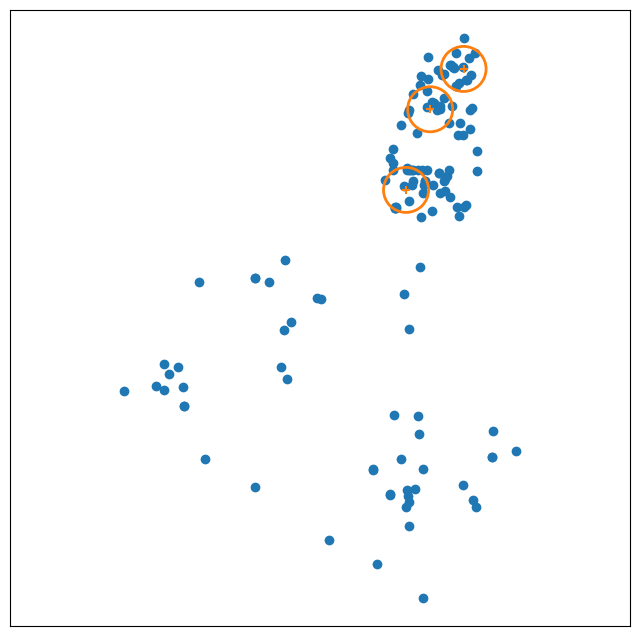

In [ ]:
# K=3, raidus=300m
opts_sites, mobjVal = mclp(df1_cctv, hospital_points, doc_points, silvertown_points,
                           oldhouse_points, police_points, light_points, points, 3, 300)
opts_sites

plot_result(points, opts_sites, 0.0027)

  Number of points 140
  K 9
  Radius 300
----- Output -----
  Running time : 0.08366227149963379 seconds
  Optimal coverage points: 12.8625


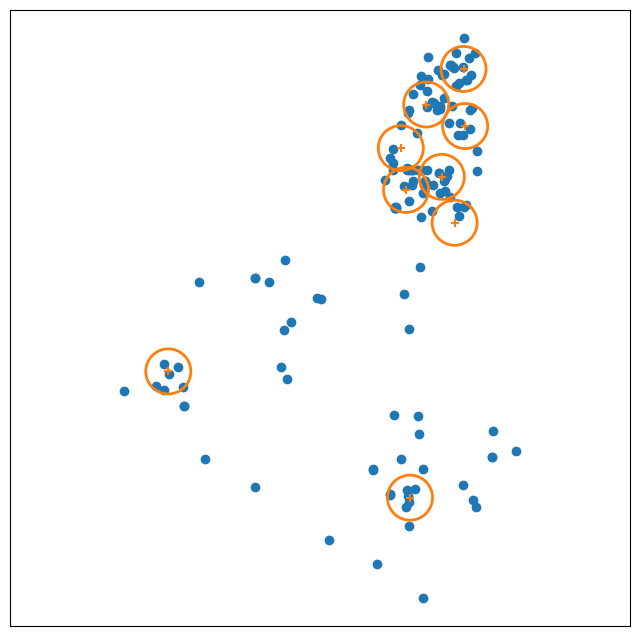

In [ ]:
# K=9, raidus=300m (천안시 참고)
opts_sites, mobjVal = mclp(df1_cctv, hospital_points, doc_points, silvertown_points,
                           oldhouse_points, police_points, light_points, points, 9, 300)
opts_sites

plot_result(points, opts_sites, 0.0027)

  Number of points 140
  K 10
  Radius 500
----- Output -----
  Running time : 0.12239289283752441 seconds
  Optimal coverage points: 16.1752


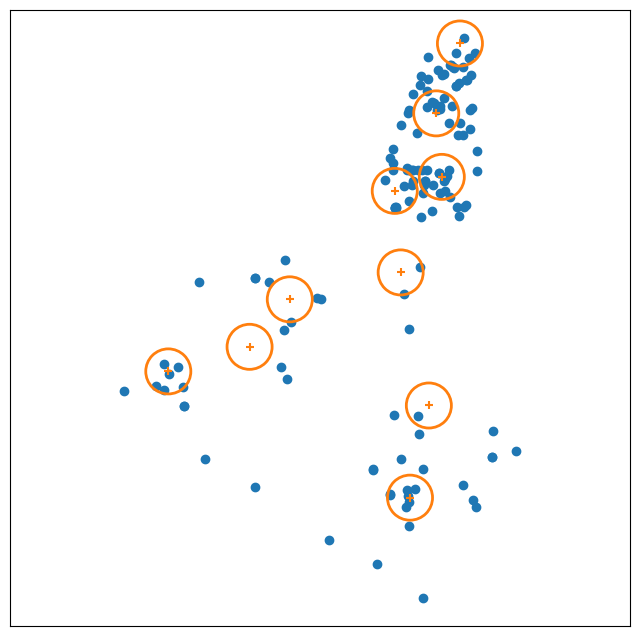

In [ ]:
# K=10, raidus=500m (노인 걸음 참고)
opts_sites, mobjVal = mclp(df1_cctv, hospital_points, doc_points, silvertown_points,
                           oldhouse_points, police_points, light_points, points, 10, 500)
opts_sites

plot_result(points, opts_sites, 0.0027)

In [ ]:
opts_sites

array([[ 35.774881  , 127.0958734 ],
       [ 35.8000853 , 127.1322227 ],
       [ 35.79791418, 127.1162367 ],
       [ 35.79298434, 127.104789  ],
       [ 35.796362  , 127.088843  ],
       [ 35.77969881, 127.101565  ],
       [ 35.79724721, 127.1238464 ],
       [ 35.76514096, 127.0929286 ],
       [ 35.79227508, 127.1145576 ],
       [ 35.79410261, 127.0778006 ]])

  Number of points 140
  K 5
  Radius 640
----- Output -----
  Running time : 0.12180685997009277 seconds
  Optimal coverage points: 15.2016


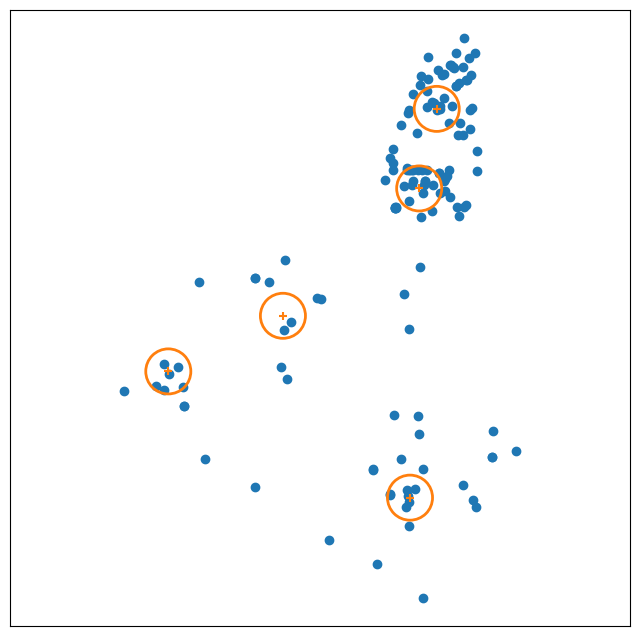

In [ ]:
# K=5, raidus=640m (노인 1분 평균 보행 속도 64m -> 10분)
opts_sites, mobjVal = mclp(df1_cctv, hospital_points, doc_points, silvertown_points,
                           oldhouse_points, police_points, light_points, points, 5, 640)
opts_sites

plot_result(points, opts_sites, 0.0027)

## 송천동

In [ ]:
place = pd.read_csv('/content/drive/MyDrive/전주시 공모전/전주시_법정동_최종_데이터/전주시_주택_법정동.csv', encoding='utf-8')
place = place[place['법정동'].str.contains('전미동1가|전미동2가|송천동1가|송천동2가')]

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/전주시 공모전/전주시_법정동_최종_데이터/전주시_CCTV_법정동.csv',encoding = 'utf-8')
df1_cctv = df1[df1['법정동'].str.contains('전미동1가|전미동2가|송천동1가|송천동2가')]
cctv_points = np.array([list(i) for i in zip(df1_cctv['WGS84위도'], df1_cctv['WGS84경도'])])

df2 = pd.read_csv('/content/drive/MyDrive/전주시 공모전/전주시_법정동_최종_데이터/전주시_병원_법정동1.csv',encoding = 'utf-8')
df2_hospital = df2[df2['행정동'].str.contains('전미동1가|전미동2가|송천동1가|송천동2가')]
hospital_points = np.array([list(i) for i in zip(df2_hospital['위도'], df2_hospital['경도'])])

df3 = pd.read_excel('/content/drive/MyDrive/전주시 공모전/전주시_법정동_최종_데이터/전주시_의원_법정동 최종.xlsx')
df3_doc = df3[df3['행정동'].str.contains('전미동1가|전미동2가|송천동1가|송천동2가')]
doc_points = np.array([list(i) for i in zip(df3_doc['Latitude'], df3_doc['Longitude'])])

df4 = pd.read_csv('/content/drive/MyDrive/전주시 공모전/전주시_법정동_최종_데이터/전주시_경로당_법정동.csv',encoding = 'utf-8')
df4_silvertown = df4[df4['행정동'].str.contains('전미동1가|전미동2가|송천동1가|송천동2가')]
silvertown_points = np.array([list(i) for i in zip(df4_silvertown['위도'], df4_silvertown['경도'])])

df5 = pd.read_excel('/content/drive/MyDrive/전주시 공모전/전주시_법정동_최종_데이터/전주시_노인복지시설_법정동_최종.xlsx')
df5_oldhouse = df5[df5['법정동'].str.contains('전미동1가|전미동2가|송천동1가|송천동2가')]
oldhouse_points = np.array([list(i) for i in zip(df5_oldhouse['Latitude'], df5_oldhouse['Longitude'])])

df6 = pd.read_csv('/content/drive/MyDrive/전주시 공모전/전주시_법정동_최종_데이터/전주시_경찰서_법정동.csv', encoding='utf-8')
df6['법정동'] = df6['법정동'].fillna('없음')
df6_police = df6[df6['법정동'].str.contains('전미동1가|전미동2가|송천동1가|송천동2가')]
police_points = np.array([list(i) for i in zip(df6_police['Latitude'], df6_police['Longitude'])])

df7 = pd.read_csv('/content/drive/MyDrive/전주시 공모전/전주시_법정동_최종_데이터/전주시_보안등_법정동1.csv',encoding = 'utf8')
df7_light = df7[df7['법정동'].str.contains('전미동1가|전미동2가|송천동1가|송천동2가')]
light_points = np.array([list(i) for i in zip(df7_light['posy'], df7_light['posx'])])


In [ ]:
X = list(list(df2_hospital['위도']) + list(df3_doc['Latitude']) + list(df4_silvertown['위도']) + list(df5_oldhouse['Latitude']) + list(df6_police['Latitude']) + list(df7_light['posy']))
Y = list(list(df2_hospital['경도']) + list(df3_doc['Longitude']) + list(df4_silvertown['경도']) + list(df5_oldhouse['Longitude']) + list(df6_police['Longitude']) + list(df7_light['posx']))
points = np.array([list(i) for i in zip(X, Y)])
print(points.shape)
points[:2]

(23, 2)


array([[ 35.8644319 , 127.1349054 ],
       [ 35.85874428, 127.1235384 ]])

In [ ]:
전체w = cctv_points.shape[0]
#cctvw = df1_cctv.shape[0]
hospitalw = df2_hospital.shape[0]
docw = df3_doc.shape[0]
silvertownw = df4_silvertown.shape[0]
oldhousew = df5_oldhouse.shape[0]
policew = df6_police.shape[0]
lightw = df7_light.shape[0]

#m1 = 0.278 * (전체w-cctvw) / 전체w
m2 = 0.193 * (전체w-hospitalw) / 전체w
m3 = 0.136 * (전체w-docw) / 전체w
m4 = 0.392 * (전체w-silvertownw) / 전체w
m5 = 0.193 * (전체w-oldhousew) / 전체w
m6 = 0.136 * (전체w-policew) / 전체w
m7 = 0.392 * (전체w-lightw) / 전체w

In [ ]:
# K=3, radius=300
opts_sites, mobjVal = mclp(df1_cctv, hospital_points, doc_points, silvertown_points,
                           oldhouse_points, police_points, light_points, points, 3, 300)
opts_sites

In [ ]:
plot_result(points, opts_sites, 0.0027)

In [ ]:
# K=4, raidus=300m (천안시 참고)
opts_sites, mobjVal = mclp(df1_cctv, hospital_points, doc_points, silvertown_points,
                           oldhouse_points, police_points, light_points, points, 4, 300)
opts_sites

In [ ]:
plot_result(points, opts_sites, 0.0027)

In [ ]:
# K=2, raidus=500m (노인 걸음 참고)
opts_sites, mobjVal = mclp(df1_cctv, hospital_points, doc_points, silvertown_points,
                           oldhouse_points, police_points, light_points, points, 2, 500)
opts_sites

  Number of points 23
  K 2
  Radius 500
----- Output -----
  Running time : 0.01627349853515625 seconds
  Optimal coverage points: 1.0231


array([[ 35.86494874, 127.1191499 ],
       [ 35.85680487, 127.1194768 ]])

In [ ]:
coords_list = [
    [ 35.86494874, 127.1191499 ],
       [ 35.85680487, 127.1194768 ]
    ]
cctv = df1
# 빈 데이터프레임 생성
result = pd.DataFrame()

# 각 좌표에 대해 필터링 수행
for coords in coords_list:
    위도, 경도 = coords
    temp_result = cctv[(cctv['WGS84위도'] == 위도) & (cctv['WGS84경도'] == 경도)]
    result = pd.concat([result, temp_result])

result['소재지지번주소']

101    전북특별자치도 전주시 덕진구 송천동1가 816-1
184      전북특별자치도 전주시 덕진구 송천동1가 397
Name: 소재지지번주소, dtype: object

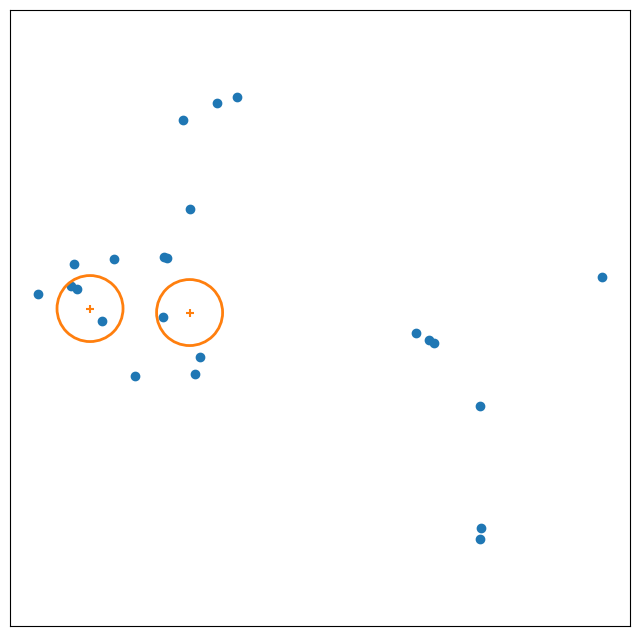

In [ ]:
plot_result(points, opts_sites, 0.0027)

In [ ]:
# K=4, raidus=640m (노인 1분 평균 보행 속도 64m -> 10분)
opts_sites, mobjVal = mclp(df1_cctv, hospital_points, doc_points, silvertown_points,
                           oldhouse_points, police_points, light_points, points, 4, 640)
opts_sites

In [ ]:
plot_result(points, opts_sites, 0.0027)

## 평화동

In [ ]:
place = pd.read_csv('/content/drive/MyDrive/전주시 공모전/전주시_법정동_최종_데이터/전주시_주택_법정동.csv', encoding='utf-8')
place = place[place['법정동'].str.contains('석구동|원당동|평화동1가|평화동2가|평화동3가')]

In [ ]:
pattern = '석구동|원당동|평화동1가|평화동2가|평화동3가'

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/전주시 공모전/전주시_법정동_최종_데이터/전주시_CCTV_법정동.csv',encoding = 'utf-8')
df1_cctv = df1[df1['법정동'].str.contains(pattern)]
cctv_points = np.array([list(i) for i in zip(df1_cctv['WGS84위도'], df1_cctv['WGS84경도'])])

df2 = pd.read_csv('/content/drive/MyDrive/전주시 공모전/전주시_법정동_최종_데이터/전주시_병원_법정동1.csv',encoding = 'utf-8')
df2_hospital = df2[df2['행정동'].str.contains(pattern)]
hospital_points = np.array([list(i) for i in zip(df2_hospital['위도'], df2_hospital['경도'])])

df3 = pd.read_excel('/content/drive/MyDrive/전주시 공모전/전주시_법정동_최종_데이터/전주시_의원_법정동 최종.xlsx')
df3_doc = df3[df3['행정동'].str.contains(pattern)]
doc_points = np.array([list(i) for i in zip(df3_doc['Latitude'], df3_doc['Longitude'])])

df4 = pd.read_csv('/content/drive/MyDrive/전주시 공모전/전주시_법정동_최종_데이터/전주시_경로당_법정동.csv',encoding = 'utf-8')
df4_silvertown = df4[df4['행정동'].str.contains(pattern)]
silvertown_points = np.array([list(i) for i in zip(df4_silvertown['위도'], df4_silvertown['경도'])])

df5 = pd.read_excel('/content/drive/MyDrive/전주시 공모전/전주시_법정동_최종_데이터/전주시_노인복지시설_법정동_최종.xlsx')
df5_oldhouse = df5[df5['법정동'].str.contains(pattern)]
oldhouse_points = np.array([list(i) for i in zip(df5_oldhouse['Latitude'], df5_oldhouse['Longitude'])])

df6 = pd.read_csv('/content/drive/MyDrive/전주시 공모전/전주시_법정동_최종_데이터/전주시_경찰서_법정동.csv', encoding='utf-8')
df6['법정동'] = df6['법정동'].fillna('없음')
df6_police = df6[df6['법정동'].str.contains(pattern)]
police_points = np.array([list(i) for i in zip(df6_police['Latitude'], df6_police['Longitude'])])

df7 = pd.read_csv('/content/drive/MyDrive/전주시 공모전/전주시_법정동_최종_데이터/전주시_보안등_법정동1.csv',encoding = 'utf8')
df7_light = df7[df7['법정동'].str.contains(pattern)]
light_points = np.array([list(i) for i in zip(df7_light['posy'], df7_light['posx'])])


In [ ]:
X = list(list(df2_hospital['위도']) + list(df3_doc['Latitude']) + list(df4_silvertown['위도']) + list(df5_oldhouse['Latitude']) + list(df6_police['Latitude']) + list(df7_light['posy']))
Y = list(list(df2_hospital['경도']) + list(df3_doc['Longitude']) + list(df4_silvertown['경도']) + list(df5_oldhouse['Longitude']) + list(df6_police['Longitude']) + list(df7_light['posx']))
points = np.array([list(i) for i in zip(X, Y)])
print(points.shape)
points[:2]

(26, 2)


array([[ 35.7747219, 127.1255843],
       [ 35.7892544, 127.1289583]])

In [ ]:
전체w = points.shape[0]
cctvw = df1_cctv.shape[0]
hospitalw = df2_hospital.shape[0]
docw = df3_doc.shape[0]
silvertownw = df4_silvertown.shape[0]
oldhousew = df5_oldhouse.shape[0]
policew = df6_police.shape[0]
lightw = df7_light.shape[0]

m1 = 0.278 * (전체w-cctvw) / 전체w
m2 = 0.193 * (전체w-hospitalw) / 전체w
m3 = 0.136 * (전체w-docw) / 전체w
m4 = 0.392 * (전체w-silvertownw) / 전체w
m5 = 0.193 * (전체w-oldhousew) / 전체w
m6 = 0.136 * (전체w-policew) / 전체w
m7 = 0.392 * (전체w-lightw) / 전체w

In [ ]:
# K=3, raidus=300m
opts_sites, mobjVal = mclp(df1_cctv,hospital_points, doc_points, silvertown_points,
                           oldhouse_points, police_points, light_points, points, 3, 300)
opts_sites

In [ ]:
plot_result(points, opts_sites, 0.0027)

In [ ]:
# K=4, raidus=300m (천안시 참고)
opts_sites, mobjVal = mclp(df1_cctv, hospital_points, doc_points, silvertown_points,
                           oldhouse_points, police_points, light_points, points, 4, 300)
opts_sites

In [ ]:
plot_result(points, opts_sites, 0.0027)

In [ ]:
# K=2, raidus=500m (노인 걸음 참고)
opts_sites, mobjVal = mclp(df1_cctv, hospital_points, doc_points, silvertown_points,
                           oldhouse_points, police_points, light_points, points, 2, 500)
opts_sites

  Number of points 26
  K 2
  Radius 500
----- Output -----
  Running time : 0.014933586120605469 seconds
  Optimal coverage points: 1.5762


array([[ 35.79175728, 127.1311551 ],
       [ 35.7953688 , 127.1409988 ]])

In [ ]:
coords_list = [
    [ 35.79175728, 127.1311551 ],
       [ 35.7953688 , 127.1409988 ]
    ]
cctv = df1
# 빈 데이터프레임 생성
result = pd.DataFrame()

# 각 좌표에 대해 필터링 수행
for coords in coords_list:
    위도, 경도 = coords
    temp_result = cctv[(cctv['WGS84위도'] == 위도) & (cctv['WGS84경도'] == 경도)]
    result = pd.concat([result, temp_result])

result['소재지지번주소']

191    전북특별자치도 전주시 완산구 평화동2가 849-7
247      전북특별자치도 전주시 완산구 평화동1가 466
Name: 소재지지번주소, dtype: object

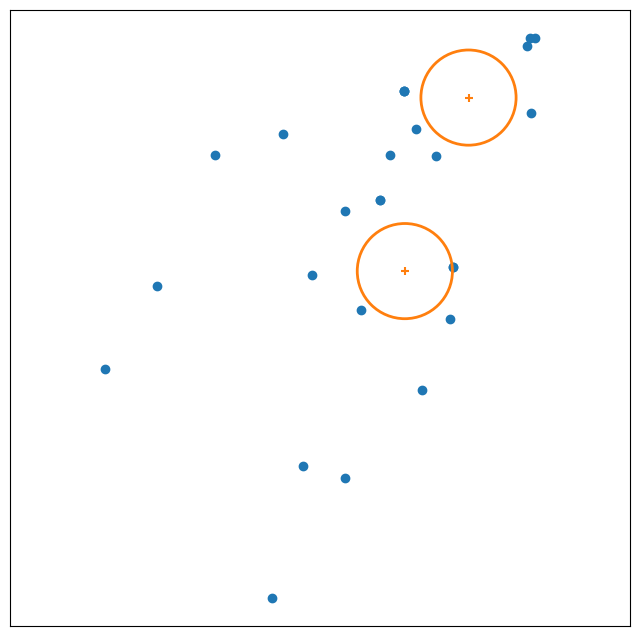

In [ ]:
plot_result(points, opts_sites, 0.0027)

In [ ]:
# K=4, raidus=640m (노인 1분 평균 보행 속도 64m -> 10분)
opts_sites, mobjVal = mclp(df1_cctv, hospital_points, doc_points, silvertown_points,
                           oldhouse_points, police_points, light_points, points, 4, 640)
opts_sites

In [ ]:
plot_result(points, opts_sites, 0.0027)